### IMPORTS

In [1]:
%pip install scikit-learn-intelex

Note: you may need to restart the kernel to use updated packages.


In [2]:
#	Enhance SVM 
from sklearnex import patch_sklearn
patch_sklearn("SVC")

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [1]:
# IMPORTS
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
import imblearn as imb

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to split the data
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from custom_adaboost import *

# to evaluate the models
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


# Some functions
from utils import *

### ***2. Machine Learning Methods:***
#### 2.1. Apply at least 3 different machine learning methods
##### Apply at least 3 different machine learning methods on your selected problem. The methods should be selected from the ones covered in the course. None of the methods are allowed to be deep learning. For each method, you should test the effect of the hyperparameters and try to find a set of hyperparameter values that work well for your problem 
##### 2.2. You should apply all the concepts you learned in the course (such as Generalization and Combating Overfitting)
Our problem is a binary classification problem , and the labels are in the target column => Supervised Learning and Classification

#### Split Data to Train & Test

In [7]:
# Read the original dataset
dataset = pd.read_csv('./dataset/final_dataset.csv')

# separate the features and labels
labels = dataset['Diabetes_binary']
features = dataset.drop('Diabetes_binary', axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Read the resampled dataset
resampled_dataset = pd.read_csv('./dataset/resampled_dataset.csv')

# separate the features and labels
labels_resampled = resampled_dataset['Diabetes_binary']
features_resampled = resampled_dataset.drop('Diabetes_binary', axis=1)

x_train_resampled, x_test_resampled, y_train_resampled, y_test_resampled = train_test_split(features_resampled, labels_resampled, test_size=0.3, random_state=42)

In [3]:
selected_features = dataset[['CholCheck', 'HighBP', 'HvyAlcoholConsump']]
print("Selected Features Shape:", selected_features.shape)

labels = dataset['Diabetes_binary']
print("Labels Shape:", labels.shape)

print(selected_features.head())
print(labels.head())
x_train, x_test, y_train, y_test = train_test_split(selected_features, labels, test_size=0.3, random_state=42)



Selected Features Shape: (253680, 3)
Labels Shape: (253680,)
   CholCheck  HighBP  HvyAlcoholConsump
0          1       1                  0
1          0       0                  0
2          1       1                  0
3          1       1                  0
4          1       1                  0
0    0
1    0
2    0
3    0
4    0
Name: Diabetes_binary, dtype: int64


In [5]:
# for logging
import logging
logger = logging.getLogger('sklearnex')
logger.setLevel(logging.INFO)

##### Method 2: SVM

##### A-Simple Model and data

In [4]:
#################################################### Model Training ####################################################
#default parameters
svm_model = SVC(kernel='linear', random_state=42, max_iter=40000)
svm_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

Training Accuracy: 0.8600768121818264
Testing Accuracy: 0.8620440449910649
Confusion Matrix: 
 [[65605     0]
 [10499     0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93     65605
           1       0.00      0.00      0.00     10499

    accuracy                           0.86     76104
   macro avg       0.43      0.50      0.46     76104
weighted avg       0.74      0.86      0.80     76104



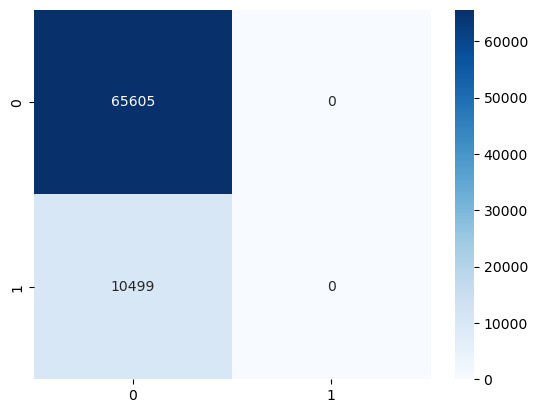

In [6]:
#################################################### Model Evaluation ####################################################
# Evaluate model
y_pred_train = svm_model.predict(x_train)
y_pred_test = svm_model.predict(x_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

#ROC-AUC Curve
# predict probabilities and keep postive outcomes only
# Calibrate the model by training on a validation set using cross-validation to get probability estimates by "sigmoid" (Platt scaling) or "isotonic regression".
# from sklearn.calibration import CalibratedClassifierCV
# calibrated_svc = CalibratedClassifierCV(svm_model)  
# calibrated_svc.fit(x_train, y_train)
# probs = svm_model.predict_proba(x_test)
# probs = probs[:, 1]

# # AUC
# auc = roc_auc_score(y_test, probs)
# print('AUC: %.3f' % auc)

# # ROC
# fpr, tpr, thresholds = roc_curve(y_test, probs)
# # plot no skill
# plt.plot([0, 1], [0, 1], linestyle='--')
# # plot the roc curve for the model
# plt.plot(fpr, tpr, marker='.')
# plt.show()


##### B-Simple Model and balanced Data

In [4]:
#################################################### Model Training ####################################################
svm_model = SVC(kernel='linear',class_weight='balanced', random_state=42, max_iter=40000)
svm_model.fit(x_train_resampled, y_train_resampled)

SVC(class_weight='balanced', kernel='linear', max_iter=40000, random_state=42)

In [10]:
#################################################### Model Evaluation ####################################################
# Evaluate model
y_pred_train = svm_model.predict(x_train_resampled)
y_pred_test = svm_model.predict(x_test_resampled)

Training Accuracy: 0.5409023545230595
Testing Accuracy: 0.5424538743979054
Confusion Matrix: 
 [[18947 46647]
 [13292 52115]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.29      0.39     65594
           1       0.53      0.80      0.63     65407

    accuracy                           0.54    131001
   macro avg       0.56      0.54      0.51    131001
weighted avg       0.56      0.54      0.51    131001



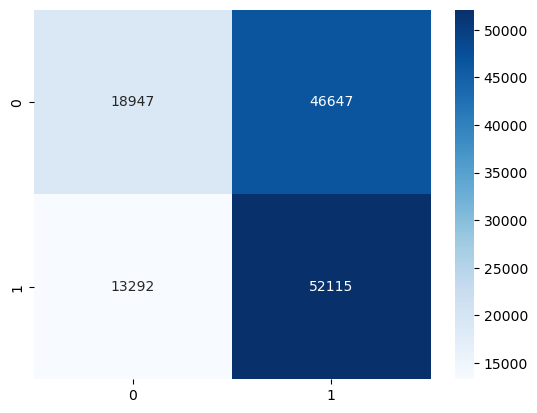

In [11]:
train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
test_accuracy = accuracy_score(y_test_resampled, y_pred_test)
conf_matrix = confusion_matrix(y_test_resampled, y_pred_test)
class_report = classification_report(y_test_resampled, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

##### C-Simple Model and PCA Data

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
scaled_features = std_scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)
print(reduced_features.shape)
# split features after pca to test and train
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(reduced_features, labels, test_size=0.3, random_state=42)



(253680, 3)


In [13]:
svm_model = SVC(kernel='linear', random_state=42, max_iter=40000)
svm_model.fit(x_train_pca, y_train_pca)

SVC(kernel='linear', max_iter=40000, random_state=42)

In [14]:
y_pred_train = svm_model.predict(x_train_pca)
y_pred_test = svm_model.predict(x_test_pca)

Training Accuracy: 0.8600768121818264
Testing Accuracy: 0.8620440449910649
Confusion Matrix: 
 [[65605     0]
 [10499     0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93     65605
           1       0.00      0.00      0.00     10499

    accuracy                           0.86     76104
   macro avg       0.43      0.50      0.46     76104
weighted avg       0.74      0.86      0.80     76104



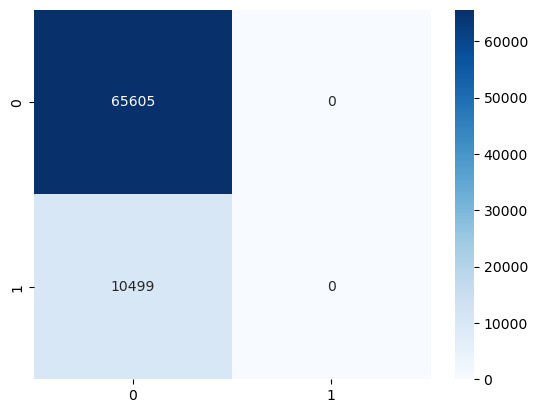

In [16]:
train_accuracy = accuracy_score(y_train_pca, y_pred_train)
test_accuracy = accuracy_score(y_test_pca, y_pred_test)
conf_matrix = confusion_matrix(y_test_pca, y_pred_test)
class_report = classification_report(y_test_pca, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

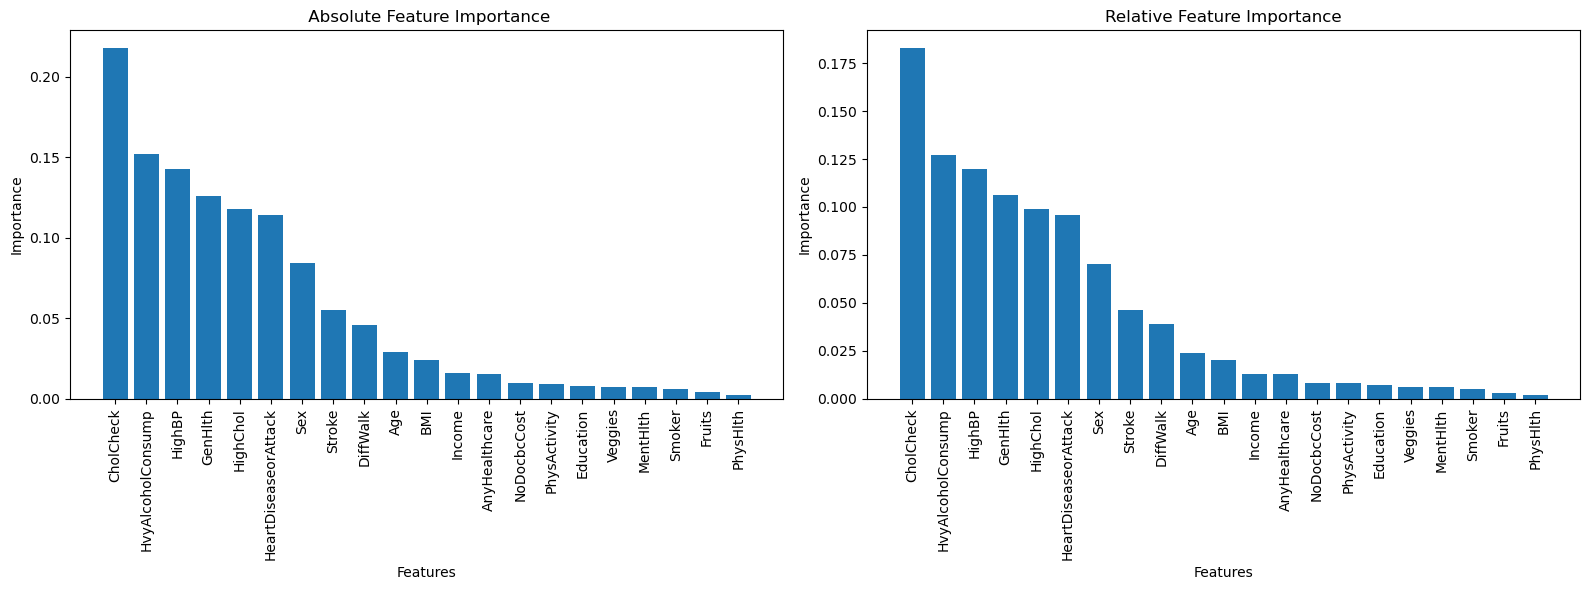

In [ ]:
#################################################### Feature's Importance ####################################################
#1-Absolute Feature Importance
feature_importance = {}
for idx, feature_name in enumerate(features):
	importance = abs(svm_model.coef_[0][idx]).round(3)  # Get the absolute value of the coefficient
	feature_importance[feature_name] = importance
sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))

# Extract feature names and importances
features_plot_x = list(sorted_feature_importance.keys())
importances_plot_y = list(sorted_feature_importance.values())

plt.figure(figsize=(16, 6))  
plt.subplot(1, 2, 1) 
plt.bar(features_plot_x, importances_plot_y)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title(' Absolute Feature Importance')

#2-Relative Feature Importance
# Calculate total importance
total_importance = sum(importances_plot_y)
relative_importances = [(importance / total_importance).round(3) for importance in importances_plot_y]

plt.subplot(1, 2, 2)
plt.bar(features_plot_x, relative_importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Relative Feature Importance')

plt.tight_layout() 
plt.show()

# print("Feature Importance (Absolute): ", relative_importances)

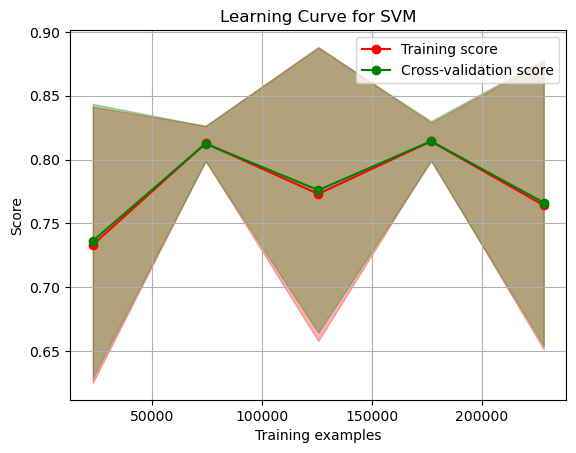

In [ ]:
# Get the learning curve plot
train_sizes, train_scores, test_scores = learning_curve(svm_model, features, labels, cv=10,
                                                            train_sizes=np.linspace(.1, 1.0, 5),
                                                            scoring='f1_weighted', shuffle=True, random_state=42)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve for SVM")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
					train_scores_mean + train_scores_std, alpha=0.3, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
					test_scores_mean + test_scores_std, alpha=0.3, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
			label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
			label="Cross-validation score")

plt.legend(loc='best')
plt.show()